/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 96979.52892934952


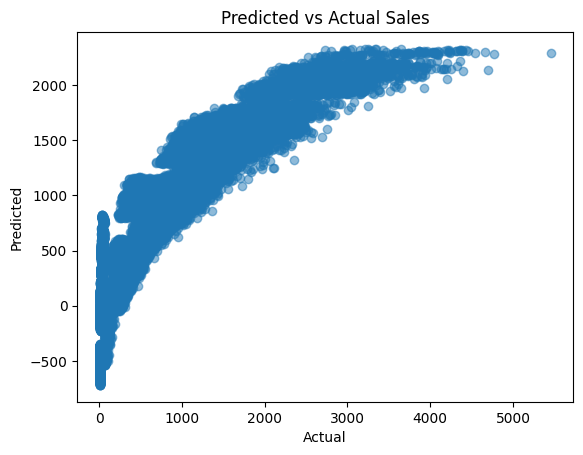

Submission file created: submission.csv


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# load provided data
train = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

# feature engineering
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['day_of_week'] = train['date'].dt.dayofweek
train['is_weekend'] = train['day_of_week'].isin([5, 6]).astype(int)

test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek
test['is_weekend'] = test['day_of_week'].isin([5, 6]).astype(int)

# encode categorical features for training
categorical_features = ['country', 'store', 'product']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(train[categorical_features]))
encoded_features.columns = encoder.get_feature_names_out(categorical_features)
train = pd.concat([train.drop(columns=categorical_features), encoded_features], axis=1)

# Split data into training and validation sets
train = train.dropna(subset=['num_sold'])
X = train.drop(columns=['num_sold', 'date'])
y = train['num_sold']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and begin linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate training model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot predictions vs actuals as scatter graph
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Sales")
plt.show()

# Match test data format to training data format
X_test = test.drop(columns=['date', 'country', 'store', 'product'])

# Predict on test dataset
test_encoded_features = pd.DataFrame(encoder.transform(test[categorical_features]))
test_encoded_features.columns = encoder.get_feature_names_out(categorical_features)
X_test = pd.concat([X_test, test_encoded_features], axis=1)
y_pred_test = model.predict(X_test)
test['predicted_sales'] = y_pred_test

# Save submissions csv
sample_submission['num_sold'] = y_pred_test[:len(sample_submission)]  # Ensure correct length
sample_submission.to_csv('/kaggle/working/submission.csv', index=False)
print("Submission file created: submission.csv")